In [1]:
%pip install langgraph

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install typing

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from typing import List, TypedDict
from langgraph.graph import StateGraph
from IPython.display import display, Image

In [24]:
class StudState(TypedDict):
    name: str
    age : str
    sub1 : int
    sub2 : int
    sub3 : int
    total : int
    final : str

In [25]:
def stud_intro(state: StudState) -> StudState:
    """First Node of sequence."""
    state['final'] = "Hello "+state['name']+"! You are " + state['age'] + " years old."
    return state

def calc_total(state: StudState) -> StudState:
    """Second Node of sequence."""
    total_marks = state['sub1'] + state['sub2'] + state['sub3']
    state['total'] = total_marks
    state['final'] = "Your total marks are " + str(state['total']) + "."
    return state

def stud_summary(state: StudState) -> StudState:
    """Third Node of sequence."""
    state['final'] = "Hello "+state['name']+"! You are " + state['age'] + " years old. Your sub1 is " + str(state['sub1']) + ", sub2 is " + str(state['sub2']) + ", sub3 is " + str(state['sub3']) + ". Your total marks are " + str(state['total']) + "."
    return state

In [33]:
graph = StateGraph(StudState)

graph.add_node("stud_intro",stud_intro)
graph.add_node("calc_total",calc_total)
graph.add_node("stud_summary",stud_summary)

graph.set_entry_point("stud_intro")
graph.add_edge("stud_intro","calc_total")
graph.add_edge("calc_total","stud_summary")
graph.set_finish_point("stud_summary")

app=graph.compile()

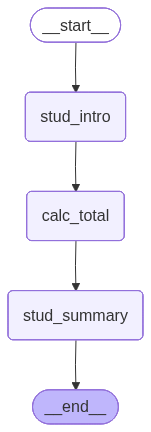

In [34]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [35]:
result=app.invoke({"name": "Saloni", "age": "21", "sub1": 85, "sub2": 90, "sub3": 88})
#print(result)
result['final']

'Hello Saloni! You are 21 years old. Your sub1 is 85, sub2 is 90, sub3 is 88. Your total marks are 263.'